In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('https://github.com/campusx-official/100-days-of-machine-learning/raw/main/day42-outlier-removal-using-zscore/placement.csv')

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [ ]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [ ]:
import matplotlib.pyplot as plt


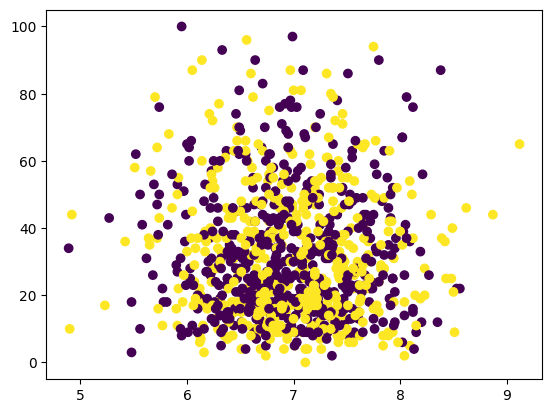

In [ ]:
plt.scatter(x=df['cgpa'], y=df['placement_exam_marks'], c=df['placed'])

In [ ]:
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

In [ ]:
X=df.drop(['placed'], axis=1)

In [ ]:
X.head()

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0


Outliers detection


In [ ]:
import seaborn as sns

<Axes: >

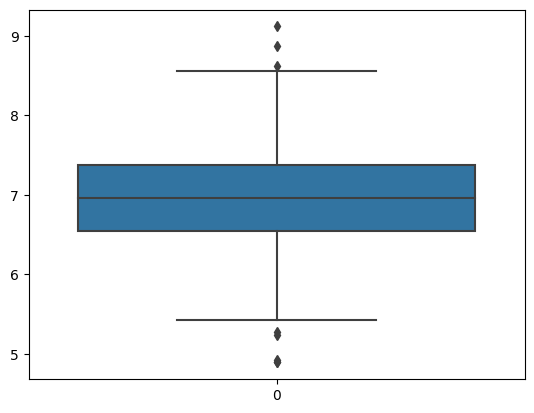

In [ ]:
sns.boxplot( df['cgpa'])

<Axes: >

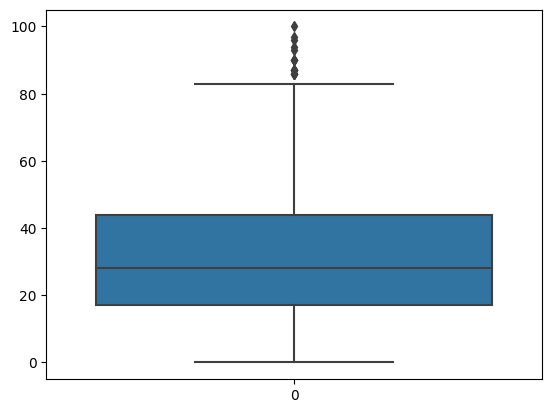

In [ ]:
sns.boxplot(df['placement_exam_marks'])

In [ ]:
X.describe()

,cgpa,placement_exam_marks
count,1000.000000,1000.000000
mean,6.961240,32.225000
std,0.615898,19.130822
min,4.890000,0.000000
25%,6.550000,17.000000
50%,6.960000,28.000000
75%,7.370000,44.000000
max,9.120000,100.000000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt

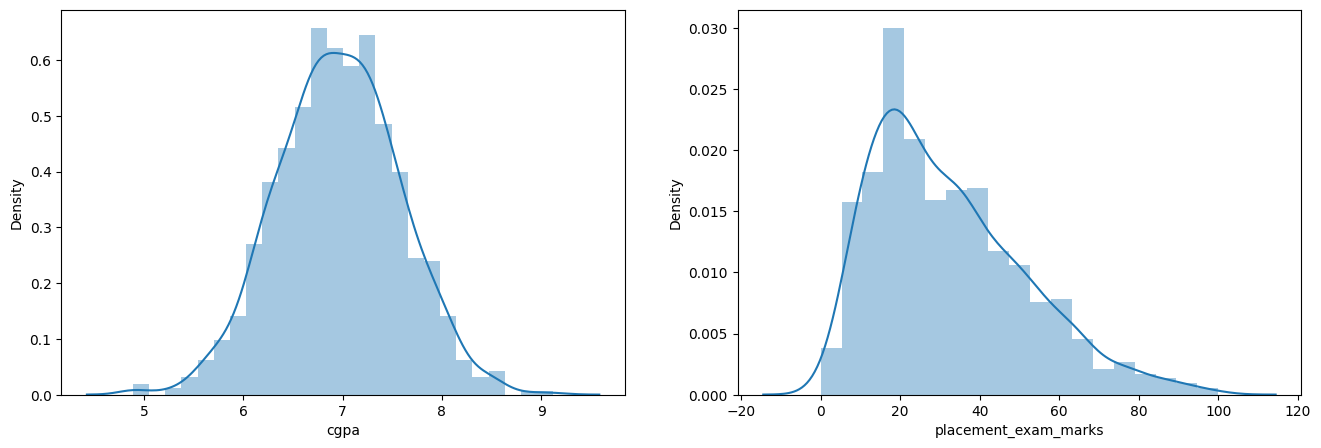

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

normally distributed(apply Z- score technique)     <------------------------------------>                      right skewed(apply IQR technique)

In [ ]:
print('mean: ', df['cgpa'].mean())
print('std: ', df['cgpa'].std())
print('min: ', df['cgpa'].min())
print('max: ', df['cgpa'].max())

mean:  6.96124
std:  0.6158978751323896
min:  4.89
max:  9.12


In [ ]:
#finding boundary values
print('Lower limit: ', df['cgpa'].mean()-3*df['cgpa'].std())
print('Upper/Higher limit: ', df['cgpa'].mean()+3*df['cgpa'].std())

Lower limit:  5.113546374602832
Upper/Higher limit:  8.808933625397168


In [ ]:
df[(df['cgpa']>8.8) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
# these are the outlier values
# now, i'll go for trimming or capping

In [ ]:
# Trimming
new_df=df[(df['cgpa']<8.80)& (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


**Applying Z score on cgpa**

In [ ]:
# approach -2
# calculating Z-score

df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/(df['cgpa'].std())

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


**Capping**

In [ ]:
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()

In [ ]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit, upper_limit,
    np.where(
        df['cgpa']<lower_limit, lower_limit,
        df['cgpa']
    )
)

In [ ]:
#np.where(a,b,c) ~~ a?b:c

In [ ]:
df.shape

(1000, 4)

In [ ]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [ ]:
y=df['placed']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: placed, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
ss.fit_transform(X)

array([[ 0.37161107, -0.32555395],
       [ 0.81021479,  0.30201993],
       [ 0.94017145,  0.40661558],
       ...,
       [-3.36464288,  0.09282864],
       [ 2.69458634,  0.72040252],
       [-3.34839829, -1.16231913]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

0.545

In [ ]:
lr.coef_

array([[ 0.08012788, -0.00348717]])

In [ ]:
lr.intercept_

array([-0.4793574])

In [ ]:
y_pred.shape

(200,)

In [ ]:
y_test.shape

(200,)

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

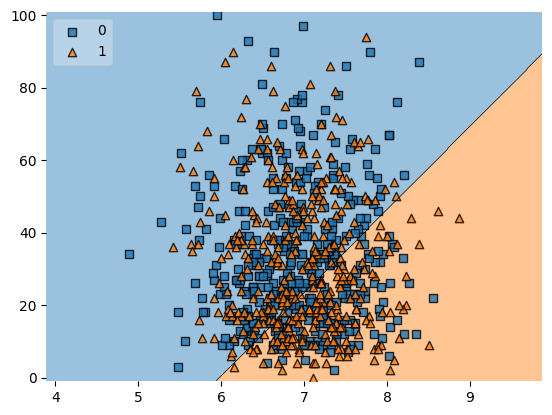

In [ ]:
plot_decision_regions(X_train.values, y_train.values, clf=lr, legend=2)